# Lab | Data Cleaning and Formatting

In [56]:
import pandas as pd

print(pd.options.display.float_format)

None


In [57]:
import pandas as pd

pd.options.display.max_rows

60

In this lab, we will be working with the customer data from an insurance company, which can be found in the CSV file located at the following link: https://raw.githubusercontent.com/data-bootcamp-v4/data/main/file1.csv


# Challenge 1: Data Cleaning and Formatting

## Exercise 1: Cleaning Column Names

To ensure consistency and ease of use, standardize the column names of the dataframe. Start by taking a first look at the dataframe and identifying any column names that need to be modified. Use appropriate naming conventions and make sure that column names are descriptive and informative.

*Hint*:
- *Column names should be in lower case*
- *White spaces in column names should be replaced by `_`*
- *`st` could be replaced for `state`*

In [58]:
"""
import numpy as np
import pandas as pd

df = pd.read_csv("file1.csv")

df.columns = [i.lower().replace(" ","_") for i in df.columns]
df.rename(columns={'st':'state'}, inplace=True)
df"""

'\nimport numpy as np\nimport pandas as pd\n\ndf = pd.read_csv("file1.csv")\n\ndf.columns = [i.lower().replace(" ","_") for i in df.columns]\ndf.rename(columns={\'st\':\'state\'}, inplace=True)\ndf'

## Exercise 2: Cleaning invalid Values

The dataset contains columns with inconsistent and incorrect values that could affect the accuracy of our analysis. Therefore, we need to clean these columns to ensure that they contain only valid data. 

Note that this exercise will focus only on cleaning inconsistent values and will not involve handling null values (NaN or None).

*Hint*:
- *Gender column contains various inconsistent values such as "F", "M", "Femal", "Male", "female", which need to be standardized, for example, to "M" and "F".*
- *State abbreviations can replaced with its full name, for example "AZ": "Arizona", "Cali": "California", "WA": "Washington"*
- *In education, "Bachelors" could be replaced by "Bachelor"*
- *In Customer Lifetime Value, delete the `%` character*
- *In vehicle class, "Sports Car", "Luxury SUV" and "Luxury Car" could be replaced by "Luxury"*

In [59]:
"""# Your code here

def clean_gender(x):
    if x in ['M', "Male"]:
        return 'M'
    elif x in ['F', 'female',"Femal"]:
        return 'F'
    else:
        return np.nan

def clean_state(x):
    changes = {"AZ": "Arizona", "Cali": "California", "WA": "Washington"}
    if x in changes:
        return changes[x]
    else:
        return x

def clean_education(x):
    if x == "Bachelors":
        return "Bachelor"
    else:
        return x

def clean_customer_lifetime_value(x):
    if isinstance(x, str):
        return float(x.replace("%",""))
    else:
        return pd.to_numeric(x, errors='coerce')

def clean_vehicle_class(x):
    if x in ['Luxury SUV', 'Sports Car','Luxury Car']:
        return 'Luxury'
    else:
        return x
    
df['gender'] = list(map(clean_gender, df['gender']))
df['state'] = df['state'].apply(clean_state)
df['education'] = df['education'].apply(clean_education)
df['customer_lifetime_value'] = df['customer_lifetime_value'].apply(clean_customer_lifetime_value)
df['vehicle_class'] = df['vehicle_class'].apply(clean_vehicle_class)

#df['vehicle_class'].unique()
#df['customer_lifetime_value'].unique()

"""

'# Your code here\n\ndef clean_gender(x):\n    if x in [\'M\', "Male"]:\n        return \'M\'\n    elif x in [\'F\', \'female\',"Femal"]:\n        return \'F\'\n    else:\n        return np.nan\n\ndef clean_state(x):\n    changes = {"AZ": "Arizona", "Cali": "California", "WA": "Washington"}\n    if x in changes:\n        return changes[x]\n    else:\n        return x\n\ndef clean_education(x):\n    if x == "Bachelors":\n        return "Bachelor"\n    else:\n        return x\n\ndef clean_customer_lifetime_value(x):\n    if isinstance(x, str):\n        return float(x.replace("%",""))\n    else:\n        return pd.to_numeric(x, errors=\'coerce\')\n\ndef clean_vehicle_class(x):\n    if x in [\'Luxury SUV\', \'Sports Car\',\'Luxury Car\']:\n        return \'Luxury\'\n    else:\n        return x\n    \ndf[\'gender\'] = list(map(clean_gender, df[\'gender\']))\ndf[\'state\'] = df[\'state\'].apply(clean_state)\ndf[\'education\'] = df[\'education\'].apply(clean_education)\ndf[\'customer_lifetime

## Exercise 3: Formatting data types

The data types of many columns in the dataset appear to be incorrect. This could impact the accuracy of our analysis. To ensure accurate analysis, we need to correct the data types of these columns. Please update the data types of the columns as appropriate. 

It is important to note that this exercise does not involve handling null values (NaN or None).

*Hint*:
- *Customer lifetime value should be numeric*
- *Number of open complaints has a wrong format, look at the diffrent values it takes with unique() and take the middle value, for example 1/5/00 should be 5. Number of open complaints is a string, remember you can use split() to deal with it and take the number you need. Finally, since it should be numeric, cast the column to be in its proper type.*

In [60]:
"""# Your code here
def clean_complaints(x):
    if isinstance(x, str):
        return float(x.split("/")[1])
    else:
        return pd.to_numeric(x, errors='coerce')
    

df['customer_lifetime_value'] =  df['customer_lifetime_value'].astype(float)
df['number_of_open_complaints'] = df['number_of_open_complaints'].apply(clean_complaints)

df['number_of_open_complaints'].unique()

"""

'# Your code here\ndef clean_complaints(x):\n    if isinstance(x, str):\n        return float(x.split("/")[1])\n    else:\n        return pd.to_numeric(x, errors=\'coerce\')\n    \n\ndf[\'customer_lifetime_value\'] =  df[\'customer_lifetime_value\'].astype(float)\ndf[\'number_of_open_complaints\'] = df[\'number_of_open_complaints\'].apply(clean_complaints)\n\ndf[\'number_of_open_complaints\'].unique()\n\n'

## Exercise 4: Dealing with Null values

Identify any columns with null or missing values. Identify how many null values each column has. You can use the isnull() function in pandas to find columns with null values.

Decide on a strategy for handling the null values. There are several options, including:

- Drop the rows or columns with null values
- Fill the null values with a specific value (such as the column mean or median for numerical variables and mode for categorical variables)
- Fill the null values with the previous or next value in the column
- Fill the null values based on a more complex algorithm or model (we haven't studied this yet)

Implement your chosen strategy to handle the null values. You can use the fillna() function in pandas to fill null values or dropna() function to drop null values.

Verify that your strategy has successfully handled the null values. You can use the isnull() function again to check if there are still null values in the dataset.

Remember to document your process and explain your reasoning for choosing a particular strategy for handling null values. 

After formatting data types, as a last step, convert all the numeric variables to integers using applymap.

In [61]:
"""# Find percentage of missing values
percent_missing = df.isnull().mean() * 100
missing_value_df = pd.DataFrame({'percent_missing': percent_missing})

missing_value_df"""

"# Find percentage of missing values\npercent_missing = df.isnull().mean() * 100\nmissing_value_df = pd.DataFrame({'percent_missing': percent_missing})\n\nmissing_value_df"

In [62]:
"""# Find and drop rows with all missing values
na_number = df.isnull().sum(axis=1)
df.drop(df[na_number == len(df.columns)].index, inplace=True)

# Replace customer_lifetime_value nan with mean value
df['customer_lifetime_value'].fillna(value=round(df.customer_lifetime_value.median(),2), inplace=True)
df['gender'].replace(np.nan, "U", inplace=True)
df['customer_lifetime_value'].unique()
"""

'# Find and drop rows with all missing values\nna_number = df.isnull().sum(axis=1)\ndf.drop(df[na_number == len(df.columns)].index, inplace=True)\n\n# Replace customer_lifetime_value nan with mean value\ndf[\'customer_lifetime_value\'].fillna(value=round(df.customer_lifetime_value.median(),2), inplace=True)\ndf[\'gender\'].replace(np.nan, "U", inplace=True)\ndf[\'customer_lifetime_value\'].unique()\n'

## Exercise 5: Dealing with duplicates

Use the .duplicated() method to identify any duplicate rows in the dataframe.

Decide on a strategy for handling the duplicates. Options include:
- Dropping all duplicate rows
- Keeping only the first occurrence of each duplicated row
- Keeping only the last occurrence of each duplicated row
- Dropping duplicates based on a subset of columns
- Dropping duplicates based on a specific column

Implement your chosen strategy using the drop_duplicates() function.

Verify that your strategy has successfully handled the duplicates by checking for duplicates again using .duplicated().

Remember to document your process and explain your reasoning for choosing a particular strategy for handling duplicates.

Save the cleaned dataset to a new CSV file.

*Hint*: *after dropping duplicates, reset the index to ensure consistency*.

In [63]:
# Your code here
"""df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)

df.info()"""

'df.drop_duplicates(inplace=True)\ndf.reset_index(drop=True, inplace=True)\n\ndf.info()'

# Bonus: Challenge 2: creating functions on a separate `py` file

Put all the data cleaning and formatting steps into functions, and create a main function that performs all the cleaning and formatting. 

Write these functions in a separate .py file(s). By putting these steps into functions, we can make the code more modular and easier to maintain. 

*Hint: autoreload module is a utility module in Python that allows you to automatically reload modules in the current session when changes are made to the source code. This can be useful in situations where you are actively developing code and want to see the effects of changes you make without having to constantly restart the Python interpreter or Jupyter Notebook kernel.*

In [2]:
# Your code here

import functions
import numpy as np
import pandas as pd

df = functions.clean_data("file1.csv")
df

,customer,state,gender,education,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,policy_type,vehicle_class,total_claim_amount
0,RB50392,Washington,U,Master,588174.24,0.0,1000.0,0.0,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,Bachelor,697953.59,0.0,94.0,0.0,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,1288743.17,48767.0,108.0,0.0,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,764586.18,0.0,106.0,0.0,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,536307.65,36357.0,68.0,0.0,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...,...
1066,TM65736,Oregon,M,Master,305955.03,38644.0,78.0,1.0,Personal Auto,Four-Door Car,361.455219
1067,VJ51327,California,F,High School or Below,2031499.76,63209.0,102.0,2.0,Personal Auto,SUV,207.320041
1068,GS98873,Arizona,F,Bachelor,323912.47,16061.0,88.0,0.0,Personal Auto,Four-Door Car,633.600000
1069,CW49887,California,F,Master,462680.11,79487.0,114.0,0.0,Special Auto,SUV,547.200000


# Bonus: Challenge 3: Analyzing Clean and Formated Data

You have been tasked with analyzing the data to identify potential areas for improving customer retention and profitability. Your goal is to identify customers with a high policy claim amount and a low customer lifetime value.

In Pandas Lab, we only looked at high policy claim amounts because we couldn't look into low customer lifetime values. If we tried to do work with that column, we wouldn't have been able to do it because customer lifetime value wasn't clean and in its proper format. So after cleaning and formatting the data, lets get some more interesting insights!

Instructions:

- Review again the statistics for total claim amount and customer lifetime value to gain an understanding of the data.
- To identify potential areas for improving customer retention and profitability, we want to focus on customers with a high policy claim amount and a low customer lifetime value. Consider customers with a high policy claim amount to be those in the top 25% of the total claim amount, and clients with a low customer lifetime value to be those in the bottom 25% of the customer lifetime value. Create a pandas DataFrame object that contains information about customers with a policy claim amount greater than the 75th percentile and a customer lifetime value in the bottom 25th percentile.
- Use DataFrame methods to calculate summary statistics about the high policy claim amount and low customer lifetime value data. To do so, select both columns of the dataframe simultaneously and pass it to the .describe() method. This will give you descriptive statistics, such as mean, median, standard deviation, minimum and maximum values for both columns at the same time, allowing you to compare and analyze their characteristics.

In [3]:
# Your code here
pd.set_option('display.float_format', lambda x: f'{x:,.2f}')
df[['customer_lifetime_value', 'total_claim_amount']].describe()

,customer_lifetime_value,total_claim_amount
count,"1,071.00","1,071.00"
mean,"793,114.58",404.99
std,"642,667.59",293.03
min,"200,435.07",0.38
25%,"404,853.46",202.16
50%,"588,174.24",354.73
75%,"894,520.99",532.80
max,"5,816,655.35","2,893.24"


In [4]:
# First try but just to see this query method
low, high = df.total_claim_amount.quantile([0.75,1])
df.query('{low}<total_claim_amount<{high}'.format(low=low,high=high))

,customer,state,gender,education,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,policy_type,vehicle_class,total_claim_amount
1,QZ44356,Arizona,F,Bachelor,"697,953.59",0.00,94.00,0.00,Personal Auto,Four-Door Car,"1,131.46"
2,AI49188,Nevada,F,Bachelor,"1,288,743.17","48,767.00",108.00,0.00,Personal Auto,Two-Door Car,566.47
17,OE15005,California,U,College,"394,524.16","28,855.00",101.00,0.00,Personal Auto,SUV,647.44
23,TZ98966,Nevada,U,Bachelor,"245,019.10",0.00,73.00,3.00,Corporate Auto,Four-Door Car,554.38
26,US89481,California,U,Bachelor,"394,637.21",0.00,111.00,0.00,Personal Auto,Four-Door Car,799.20
...,...,...,...,...,...,...,...,...,...,...,...
1059,YG44474,Oregon,M,College,"1,401,472.13","54,193.00",117.00,0.00,Corporate Auto,SUV,720.75
1061,RY92647,California,F,Bachelor,"1,050,677.17",0.00,92.00,0.00,Personal Auto,Four-Door Car,546.52
1068,GS98873,Arizona,F,Bachelor,"323,912.47","16,061.00",88.00,0.00,Personal Auto,Four-Door Car,633.60
1069,CW49887,California,F,Master,"462,680.11","79,487.00",114.00,0.00,Special Auto,SUV,547.20


In [5]:
high_claim = df.total_claim_amount.quantile(0.75)
low_lifetime_value = df.customer_lifetime_value.quantile(0.25)

print("Total claim amount 75th percentile:", high_claim)
print("Customer lifetime value 25th percentile:", low_lifetime_value)

problematic_customers_df = df.loc[(df['total_claim_amount'] >= high_claim) & (df['customer_lifetime_value'] <= low_lifetime_value)]
problematic_customers_df[['total_claim_amount','customer_lifetime_value']].describe()

Total claim amount 75th percentile: 532.8
Customer lifetime value 25th percentile: 404853.45999999996


,total_claim_amount,customer_lifetime_value
count,41.00,41.00
mean,719.12,"340,056.27"
std,150.39,"57,043.70"
min,532.80,"228,759.69"
25%,632.72,"289,873.27"
50%,679.37,"365,253.24"
75%,799.20,"387,364.70"
max,"1,185.99","402,381.44"


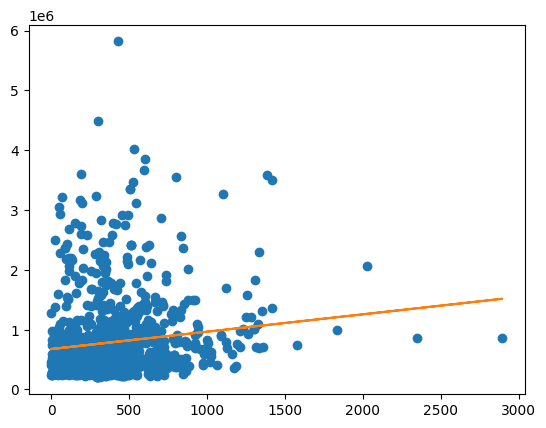

In [19]:
import matplotlib.pyplot as plt

x = np.array(df['total_claim_amount'])
y = np.array(df['customer_lifetime_value'])

#create basic scatterplot
plt.plot(x, y, 'o')

#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(x, y, 1)

#add linear regression line to scatterplot 
plt.plot(x, m*x+b)
